In [2]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\ljj12/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


In [19]:
# print(data)
# print(labels)
prediction = model(data)
print(prediction)

tensor([[-7.9723e-01, -1.0933e-01, -8.6300e-01, -1.5902e+00, -5.2842e-01,
         -1.3140e-01, -5.2907e-01,  6.2853e-01,  5.5002e-01, -6.8234e-01,
         -7.7501e-01, -1.0617e+00, -1.5839e-02, -7.6296e-01, -1.0620e+00,
         -3.9417e-01, -7.1399e-01, -1.7148e-01, -3.9208e-01, -4.1414e-01,
         -1.4946e+00, -5.8705e-01, -9.3997e-01,  2.7991e-01, -8.9469e-01,
         -1.4481e+00, -8.3059e-01, -1.2061e+00, -1.1113e+00, -4.6271e-02,
         -8.0552e-01, -6.9974e-01, -6.2664e-01, -4.3358e-01, -3.3062e-01,
         -4.6636e-01,  4.2995e-01, -6.8072e-01, -2.3920e-01,  2.7194e-01,
         -2.9657e-01, -7.7102e-01, -9.6914e-01,  6.6581e-02, -4.8958e-01,
         -6.5871e-01, -3.3230e-01, -5.5677e-01, -1.1066e+00, -1.3263e+00,
         -3.0647e-01,  4.9832e-01, -3.9817e-01, -9.1667e-01, -1.4195e-01,
         -1.2537e+00, -3.8298e-01, -1.8552e+00, -6.1937e-01, -6.4125e-01,
          5.7894e-01,  1.3090e-01, -2.6730e-01, -1.9166e-01, -7.4627e-01,
         -3.9785e-01, -5.5386e-01, -5.

In [20]:
loss = (prediction - labels).sum()
print(type(loss))

<class 'torch.Tensor'>


In [21]:
loss.backward()

In [25]:
optim = torch.optim.SGD(model.parameters(),lr=1e-2,momentum=0.9)

In [28]:
print(loss.grad)

None


In [29]:
optim.step()

autograd

In [37]:
import torch
a = torch.tensor([2.,3.], requires_grad=True)
b = torch.tensor([6.,4.], requires_grad=True)
Q = 3*a**3 - b**2
print(a)
print(b)
print(Q)
print(Q.sum().backward())
print(a.grad)
print(b.grad)


tensor([2., 3.], requires_grad=True)
tensor([6., 4.], requires_grad=True)
tensor([-12.,  65.], grad_fn=<SubBackward0>)
None
tensor([36., 81.])
tensor([-12.,  -8.])


In [45]:
# for param in model.parameters():
  # print(param.grad)

### 训练模型

In [46]:
import torchvision.transforms as tf

transform = tf.Compose([tf.ToTensor(),tf.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


horse  ship horse horse


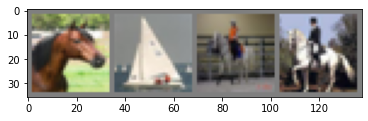

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


### cnn


In [73]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1,2,3])
print(x)
print(p)
xx = x.unsqueeze(-1).pow(p)

print(xx)

torch.tensor([[2,1],[3,4]]).flatten()

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])
tensor([1, 2, 3])
tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])


tensor([2, 1, 3, 4])